# Assignment 1
Sequential Models in Data Science 


Bayesian Inference 


Submitted by Ariel Fuxman and Gilad Zusman 


Submited to Yirmeyahu Kaminski 

Import the necessary libraries

In [94]:
import numpy as np
from scipy.special import factorial
from matplotlib import pyplot as plt
np.set_printoptions(suppress = True)

# 1 Poisson Distribution

In [95]:
n = 100
lam = 5
samples = np.random.poisson(lam, n)

# 2 Conjugate Prior

**1)** The Poisson distribution has density function:
$$
f(x|\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}, \quad x\in {0,1,\ldots}, \quad \lambda \in (0, \infty)
$$
The support of $f(x|\lambda)$ does not depend on the parameter $\lambda$. In addition, it could be re-written as:
$$
f(x|\lambda) = \frac{1}{x!}\exp\left(x\ln(\lambda) - \lambda\right)
$$
Therefore, the Poisson distribוtion belongs to the exponential family. 


**2)**
The exponential family provides us with a conjugate prior:
$$
\pi(\lambda|\alpha,\beta) \propto \exp\left((\alpha - 1)\ln\lambda-\beta\lambda\right) = e^{-\beta\lambda}\lambda^{\alpha-1}
$$
**3)**
Let's normalize:
$$
\int_0^\infty e^{-\beta\lambda}\lambda^{\alpha-1}d\lambda = \frac{1}{\beta}\int_0^\infty e^{-\beta\lambda}\lambda^{\alpha-1}\beta d\lambda
$$
Substitute $t = \beta\lambda$ and use the Gamma function:
$$
= \frac{1}{\beta}\int_0^\infty e^{-t}\left(\frac{t}{\beta}\right)^{\alpha-1}dt= \frac{1}{\beta^\alpha}\int_0 ^\infty t^{\alpha - 1}e^{-t}dt=\frac{\Gamma(\alpha)}{\beta^\alpha}
$$
So
$$
\pi(\lambda|\alpha,\beta) = \frac{\beta^\alpha e^{-\beta\lambda}\lambda^{\alpha-1}}{\Gamma(\alpha)} = \Gamma(\alpha,\beta)
$$
**4**)
The likelihood is:
$$
f(\textbf{X}|\lambda) = \prod_{j=1}^n f(x_j|\lambda) = \prod_{j=1}^n \frac{1}{x_j!}e^{x_j\ln\lambda-\lambda} = \prod_{j=1}^n \left(\frac{1}{x_j!}\right) e^{\ln(\lambda)\sum_{j=1}^n x_j - n\lambda}
$$
So the posterior is:
$$
f(\lambda | \textbf{X}, \alpha, \beta) = f(\textbf{X} | \lambda) \pi(\lambda | \alpha, \beta) \propto \exp\left(\ln(\lambda)\left(\sum_{j=1}^n x_j + \alpha - 1\right) - (n + \beta)\lambda\right)
$$
Indeed, the posterior also belongs to the Gamma distribution.
$$
\lambda | \textbf{X}, \alpha, \beta \sim \Gamma\left(\sum_{j=1}^n x_j + \alpha, n + \beta\right)
$$

# 3 Marginalizing the Hyper Parameters

**1)**
$$
\pi(\lambda | \alpha, \beta) = \frac{\beta^\alpha\lambda^{\alpha-1}e^{-\beta\lambda}}{\Gamma(\alpha)}, \quad \alpha,\beta > 0
$$
$$
\ln \pi(\lambda | \alpha, \beta) = \alpha \ln \beta + (\alpha - 1) \ln\lambda - \beta\lambda-\ln\Gamma(\alpha)
$$
$$
\frac{\partial \ln \pi(\lambda | \alpha, \beta)}{\partial\alpha} = \ln \beta + \ln\lambda -\psi(\alpha)
$$
$$
\frac{\partial^2 \ln \pi(\lambda | \alpha, \beta)}{\partial\alpha^2} = -\psi '(\alpha)
$$
$\Gamma(\alpha,\beta) \in C^2$, so by Schwarz's theorem,
$$
\frac{\partial^2 \ln \pi(\lambda | \alpha, \beta)}{\partial\alpha\,\partial\beta} = \frac{\partial^2 \ln \pi(\lambda | \alpha, \beta)}{\partial\beta\,\partial\alpha} = \frac{1}{\beta}
$$
$$
\frac{\partial \ln \pi(\lambda | \alpha, \beta)}{\partial\beta} = \frac{\alpha}{\beta} - \lambda
$$
$$
\frac{\partial^2 \ln \pi(\lambda | \alpha, \beta)}{\partial\beta^2} = \frac{\alpha}{\beta^2}
$$
All the second order derivatives are constant with respect to $\lambda$, so taking the expected value leaves them unchanged. Therefore, we arrive at Ficher's information matrix:
$$
I(\alpha, \beta) = 
\begin{pmatrix}
\psi'(\alpha) & -\frac{1}{\beta}\\
-\frac{1}{\beta} & \frac{\alpha}{\beta^2}
\end{pmatrix}
$$
**2)**
Since $\beta > 0$, Jeffry's prior is:
$$
\pi_{\alpha,\beta}(\alpha, \beta) \propto \sqrt{\det I(\alpha, \beta)} = \sqrt{\frac{\psi'(\alpha)\alpha - 1}{\beta^2}} = \frac{\sqrt{\psi'(\alpha)\alpha - 1}}{\beta}
$$
It is evidently an improper prior, since the integral
$$
\int_0^\infty \int_0^\infty \frac{\sqrt{\psi'(\alpha)\alpha - 1}}{\beta} d\alpha\,d\beta
$$
diverges. 


**3)** However, we can still use this prior.
$$
\begin{align*}
f(\lambda|\textbf{X}) &= \int_0^\infty \int_0^\infty f(\lambda | \textbf{X}, \alpha, \beta)\ \pi_{\alpha,\beta}(\alpha, \beta)d\alpha\,d\beta \propto \\ 
&\propto \int_0^\infty \int_0^\infty \frac{(n+\beta)^{\sum x_j + \alpha}e^{-(n+\beta)\lambda}\lambda^{\sum x_j + \alpha - 1}}{\Gamma(\sum x_j + \alpha)} \frac{\sqrt{\psi'(\alpha)\alpha - 1}}{\beta} d\alpha\,d\beta
\end{align*}
$$

# Maximum Likelihood Type II

**4.1)**
Performing an integral calculation similar to **2.3)**, 
\begin{align*}
f(\mathbf{X}|\alpha,\beta) &= \int_0^\infty f(\mathbf{X}|\lambda, \alpha,\beta)\pi(\lambda|\alpha,\beta)d\lambda = \\
&= \int_0^\infty \frac{1}{\prod x_j!} e^{\ln(\lambda)\sum x_j - n\lambda} \frac{\beta^\alpha e^{-\beta\lambda}\lambda^{\alpha-1}}{\Gamma(\alpha)}d\lambda = \\
&= \frac{1}{\prod x_j!} \frac{\beta^\alpha}{\Gamma(\alpha)} \int_0^\infty \lambda^{\sum x_j + \alpha - 1} e^{-(n + \beta)\lambda} d\lambda = \\
&= \frac{1}{\prod x_j!}\frac{\beta^\alpha}{\Gamma(\alpha)} \frac{\Gamma(\sum x_j + \alpha)}{(n+\beta)^{\sum x_j + \alpha}}
\end{align*}
**4.2)** 
The term $\frac{1}{\prod x_j!}$ is constant with respect to $(\alpha, \beta)$, so it is equivalent to maximizing
$$
\frac{\beta^\alpha}{\Gamma(\alpha)} \frac{\Gamma(\sum x_j + \alpha)}{(n+\beta)^{\sum x_j + \alpha}}
$$
Denote $s = \sum x_j$. A function is maximized whenever its logarithm is maximized, so we can maximize:
$$
\varphi(\alpha, \beta) := \alpha\ln(\beta) + \ln\left(\Gamma(s + \alpha)\right) - \ln\left(\Gamma(\alpha)\right) - (s + \alpha)\ln(n+\beta)
$$
Assume $s > 0$. Fixing $\alpha$, the optimal $\beta$ can be found by differentiation:
$$
\frac{\partial \varphi}{\partial \beta} = \frac{\alpha}{\beta} - \frac{s+\alpha}{n+\beta} = 0 \iff \beta = \alpha\frac{n}{s}
$$
Indeed, it is the maximal point, since
$$
\frac{\partial^2 \varphi}{\partial\beta^2} = \frac{-\alpha}{\beta^2} + \frac{s + \alpha}{(n + \beta)^2}
$$
$$
\Longrightarrow \frac{\partial^2 \varphi(\alpha, \beta^*)}{\partial\beta^2} = \frac{1}{n^2}\left(-\frac{s^2}{\alpha}+\frac{s^2+\alpha s}{s+\alpha}\right) < 0
$$
Regarding $\alpha^*$, note that since we assumed $s > 0$, then $s \in \mathbb{N}$, and so
$$
\ln\left(\Gamma(s + \alpha)\right) - \ln\left(\Gamma(\alpha)\right) = \ln\left(\frac{\Gamma(s+\alpha)}{\Gamma(\alpha)}\right) = \ln\left(\frac{\Gamma(\alpha)(s+\alpha - 1)\cdot\ldots\cdot(\alpha)}{\Gamma(\alpha)}\right) = \sum_{j=0}^{s-1}\ln(\alpha + j)
$$
$$
\Longrightarrow \frac{\partial \varphi}{\partial \alpha} = \ln(\beta) - \alpha\ln(n+\beta) + \sum_{j=0}^{s-1}\frac{1}{(\alpha + j)}
$$
$$
\Longrightarrow \frac{\partial \varphi}{\partial \alpha}(\alpha,\beta^*) = \ln\left(\frac{\alpha}{\alpha + s}\right) + \sum_{j=0}^{s-1}\frac{1}{(\alpha + j)}
$$
Now, we prove that $\frac{\partial \varphi}{\partial \alpha}(\alpha,\beta^*) > 0$ for all $\alpha > 0$. Considering the inequality $e^x > 1 + x$ for all $x > 0$, 
\begin{align*}
\exp\left(\frac{\partial \varphi}{\partial \alpha}(\alpha,\beta^*)\right) &= \frac{\alpha}{\alpha + s}e^{1/\alpha}\cdot\ldots\cdot e^{1/(\alpha+s - 1)} > \\
&> \frac{\alpha}{\alpha + s}\left(1+\frac{1}{\alpha}\right)\cdot\ldots\cdot\left(1+\frac{1}{\alpha+s-1}\right) = \frac{\alpha}{\alpha + s}\frac{\alpha+1}{\alpha}\cdot\ldots\cdot\frac{\alpha+s}{\alpha+s-1} = 1
\end{align*}
since the last product is telescopic. This means that the expression is strictly monotone as a function of $\alpha$, so actually $\alpha^* = +\infty$

# Predictive Posterior Distribution

**5)**
Instead of writing $\alpha^*, \beta^*$, we will resort to writing $\alpha$ and $\beta$, but we will remember that they are determined values. We are again be left with an integral we have seen in **2.3)**:
\begin{align*}
f(x|\textbf{X}) &= \int_0^\infty f(x|\lambda)f(\lambda|\textbf{X},\alpha,\beta)d\lambda = \\
       &= \int_0^\infty \frac{e^{-\lambda}\lambda^x}{x!}\frac{(n+\beta)^{s+\alpha}e^{-(n+\beta)\lambda}\lambda^{s+\alpha-1}}{\Gamma(s + \alpha)} d\lambda = \\
       &= \frac{(n+\beta)^{s+\alpha}}{\Gamma(x+1)\Gamma(s + \alpha)}\int_0^\infty \lambda^{s+\alpha+x-1}e^{-(n+\beta+1)}d\lambda = \\
       &= \frac{(n+\beta)^{s+\alpha}\Gamma(s+\alpha+x)}{\Gamma(x+1)\Gamma(s+\alpha)(n+\beta+1)^{s+\alpha+x}}
\end{align*}
If $\alpha \in \mathbb{N}$, then
$$
f(x|\textbf{X}) = \frac{(n+\beta)^{s+\alpha}}{(n+\beta+1)^{s+\alpha+x}}\frac{(s+\alpha+x-1)!}{(s+\alpha-1)!\;x!}
$$
For an advantageous numerical calculation, we take the log:
$$
\ln f(x|\textbf{X}) = (s+\alpha)\ln(n+\beta) - (s+\alpha+x)\ln(n+\beta+1) -\sum_{j=1}^{x}\ln(j)+\sum_{j=0}^{x - 1}\ln(s+\alpha+j)
$$

# Monte-Carlo Computations

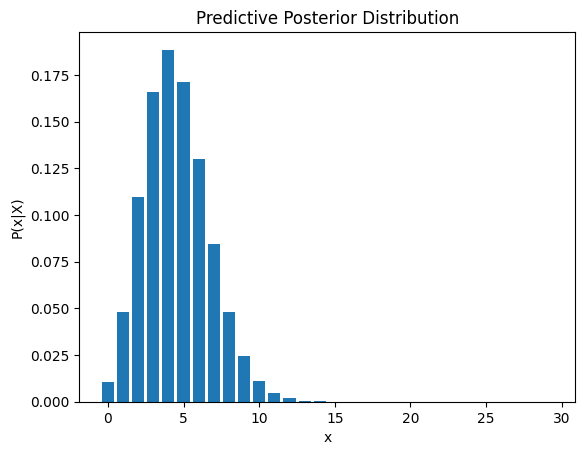

In [96]:
def PredictivePosterior(x, s, n, alpha, beta):
    #Numerically stable implementation:
    x = int(x)
    log_result = (s + alpha) * np.log(n + beta) - (s + alpha + x) * np.log(n + beta + 1) - np.sum([np.log(j + 1) for j in range(x)]) + np.sum([np.log(s + alpha + j) for j in range(x)])
    return np.exp(log_result)

s = np.sum(samples)
alpha = 1000
beta = n / s * alpha
f = np.vectorize(lambda x: PredictivePosterior(x, s, n, alpha, beta))
x = np.arange(30) #The posterior predictive distribution decays quite fast
y = f(x)
plt.title("Predictive Posterior Distribution")
plt.xlabel("x")
plt.ylabel("P(x|X)")
plt.bar(x, y)
plt.show()

Now, we again draw $n = 100$ samples, but now from the predictive posterior distribution. Numpy probably performs the scheme you taught us, it calculates the CDF and samples uniformly a number from the interval $[0,1]$

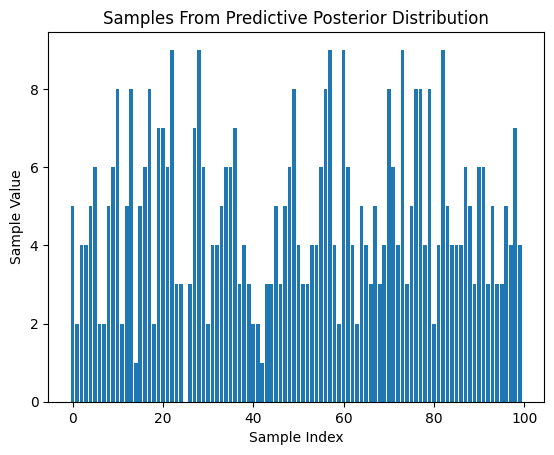

In [97]:
plt.title("Samples From Predictive Posterior Distribution")
post_samples = np.random.choice(len(x), n, p = y) 
plt.xlabel("Sample Index")
plt.ylabel("Sample Value")
plt.bar(np.arange(n), post_samples)
plt.show()

Now, calculate the average and the variance of the new samples. Remember that:
$$
X \sim P(\lambda) \Longrightarrow E[X] = \text{Var}[X] = \lambda
$$
It is interesting to compare it with the average and variance of the initial samples.

In [98]:
print("Initial samples average:", np.average(samples))
print("Post samples average:", np.average(post_samples))
print("Initial samples variance:", np.var(samples))
print("Post samples variance:", np.var(post_samples))

Initial samples average: 4.55
Post samples average: 4.75
Initial samples variance: 4.0875
Post samples variance: 4.4875
